In [1]:
from lxml import etree

In [2]:
from typing import List, Tuple

In [3]:
def load_sentirueval_2016(file_name: str) -> Tuple[List[str], List[str]]:
    texts = []
    labels = []
    with open(file_name, mode='rb') as fp:
        xml_data = fp.read()
    root = etree.fromstring(xml_data)
    for database in root.getchildren():
        if database.tag == 'database':
            for table in database.getchildren():
                if table.tag != 'table':
                    continue
                new_text = None
                new_label = None
                for column in table.getchildren():
                    if column.get('name') == 'text':
                        new_text = str(column.text).strip()
                        if new_label is not None:
                            break
                    elif column.get('name') not in {'id', 'twitid', 'date'}:
                        if new_label is None:
                            label_candidate = str(column.text).strip()
                            if label_candidate in {'0', '1', '-1'}:
                                new_label = 'negative' if label_candidate == '-1' else \
                                    ('positive' if label_candidate == '1' else 'neutral')
                                if new_text is not None:
                                    break
                if (new_text is None) or (new_label is None):
                    raise ValueError('File `{0}` contains some error!'.format(file_name))
                texts.append(new_text)
                labels.append(new_label)
            break
    return texts, labels

In [4]:
texts, labels = load_sentirueval_2016('bank_train_2016.xml')

In [5]:
print('Number of texts is {0}, number of labels is {1}.'.format(len(texts), len(labels)))

Number of texts is 9392, number of labels is 9392.


In [6]:
import random

In [7]:
for idx in random.choices(list(range(len(texts))), k=20):
    print('{0} => {1}'.format(labels[idx], texts[idx]))

neutral => ипотека на строительство дома сбербанк http://t.co/MHqYGR9TRp
neutral => Умница дочка: Банк ВТБ (Азербайджан): http://t.co/dutDRGHmGH с помощью @YouTube
neutral => Новокузнецк сбербанк россии условия автокредитования http://t.co/nAHg6d8HdR
neutral => http://t.co/heeR3dbikM Оформить кредитную карту альфа банка
neutral => #сбербанк бизнес онлайн вход в систему http://t.co/BQilQ5Zlft
neutral => С ипатекой сбербанка.. http://t.co/qIkDLCHPqv
negative => @Vinokurov12 @navalny http://t.co/b8CL3Lq7LS сбер попал под ЕС
neutral => Сбербанк и "ВТБ 24" выплатят возмещения вкладчикам Мастер-банка
neutral => кредит в сбербанке без поручителей http://t.co/Xe6dflVGDN
neutral => кредитная карта альфа банк вишня http://t.co/gxKtTpvdr8
neutral => Банк втб 24 потребительский кредит отзывы http://t.co/FlNWU9Zoha
neutral => В ноябре Сбербанк выдал вологжанам кредитов на сумму 1,75 млрд. рублей
neutral => 300000 в кредит в сбербанке http://t.co/IQcVn26dBv
negative => БИЛЕТ РЖД КУПЛЕННЫЙ ЧЕРЕЗ МЕГА

In [8]:
positive_tweets = [texts[idx] for idx in range(len(texts)) if labels[idx] == 'positive']
negative_tweets = [texts[idx] for idx in range(len(texts)) if labels[idx] == 'negative']

In [9]:
for cur in positive_tweets[:5]: print(cur)

@sawik_shuster @YevhenS Главное чтоб банки СБЕР и ВТБ!!!
Самый выгодный автокредит в втб 24 http://t.co/CDJ5P40x7g
http://t.co/h6r6GdBe4H Легко можно получить денежный кредит ы втб 24 банке
Снижение процентной ставки по кредиту на недвижимость сбербанк http://t.co/MredO898wK
В наш сбербанк пришел американец и попросил сфоткаться с ним у банкомата ;D 
я ваще была в шоке и на фотке полюбому получилась смешная xD


In [10]:
for cur in negative_tweets[:5]: print(cur)

@ShtirliZ_ @Zhukova_olga @winzard @tereshenkov обязательно про сбербанк напишите! Временами похлеще интернет магазинов финты выкручивает)
@Umka_75 @Alfarius2012 @igor_sechin втб и сбер точно. вопрос-блокировка операций или запрет на кредиты?
Канада ввела санкции против Газпромбанка, ВЭБа, Новатэка и российских оборонных компаний
RT @letokot: Если Сбер и ВТБ попали под санкции, будет жопа
RT @360_tv_ru: #Канада ввела санкции против 10 оборонных и сырьевых компаний и банков #РФ. Среди них, в частности, "#Газпромбанк", "#Внешэк…


In [11]:
from nltk import word_tokenize

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
vectorizer = CountVectorizer(lowercase=True, tokenizer=word_tokenize)

In [14]:
vectorizer.fit(texts)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function word_tokenize at 0x7f0325187950>,
                vocabulary=None)

In [15]:
print(vectorizer.get_feature_names()[0:20])

['!', '#', '$', '%', '&', "''", '(', ')', '*^____^*', '*бесится*', '*трипл-смайлик-крик-мунка*', '+', '+3,49', '+300', '+5тыс', '+74955102933', '+в', ',', '-', '--']


In [16]:
print(len(vectorizer.get_feature_names()))

20240


In [17]:
X = vectorizer.transform(texts)

In [18]:
print(type(X))

<class 'scipy.sparse.csr.csr_matrix'>


In [19]:
print(texts[0])

http://t.co/YEVHuvVGA1 Взять кредит тюмень альфа банк


In [20]:
print(X[0])

  (0, 6321)	1
  (0, 7199)	1
  (0, 7775)	1
  (0, 9093)	1
  (0, 9295)	1
  (0, 9866)	1
  (0, 12802)	1
  (0, 19056)	1


In [21]:
print(vectorizer.get_feature_names()[6321])

//t.co/yevhuvvga1


In [22]:
print(vectorizer.get_feature_names()[9866])

взять


In [23]:
print(vectorizer.get_feature_names()[19056])

тюмень


In [24]:
from sklearn.feature_extraction.text import TfidfTransformer

In [25]:
transformer = TfidfTransformer().fit(X)

In [26]:
X_transformed = transformer.transform(X)

In [27]:
print(X_transformed[0])

  (0, 19056)	0.5196718117883131
  (0, 12802)	0.1747696254947399
  (0, 9866)	0.2815105414658593
  (0, 9295)	0.20532647450968283
  (0, 9093)	0.26133302396332425
  (0, 7775)	0.10105244280985996
  (0, 7199)	0.09241698661915439
  (0, 6321)	0.7006726731639271


In [28]:
print(vectorizer.get_feature_names()[19056])

тюмень


In [29]:
print(vectorizer.get_feature_names()[7199])

:


In [30]:
tokens_with_IDF = list(zip(vectorizer.get_feature_names(), transformer.idf_))

In [31]:
for feature, idf in tokens_with_IDF[0:20]: print('{0:.6f} => {1}'.format(idf, feature))

4.417620 => !
3.144655 => #
6.276519 => $
5.636861 => %
5.647910 => &
4.134005 => ''
4.805386 => (
4.443938 => )
9.454573 => *^____^*
9.454573 => *бесится*
9.454573 => *трипл-смайлик-крик-мунка*
9.049108 => +
9.454573 => +3,49
9.454573 => +300
9.454573 => +5тыс
9.454573 => +74955102933
9.454573 => +в
2.753227 => ,
4.420872 => -
8.761426 => --


In [32]:
sorted_tokens_with_IDF = sorted(tokens_with_IDF, key=lambda it: (-it[1], it[0]))

In [33]:
for feature, idf in sorted_tokens_with_IDF[0:20]: print('{0:.6f} => {1}'.format(idf, feature))

9.454573 => *^____^*
9.454573 => *бесится*
9.454573 => *трипл-смайлик-крик-мунка*
9.454573 => +3,49
9.454573 => +300
9.454573 => +5тыс
9.454573 => +74955102933
9.454573 => +в
9.454573 => -4.8
9.454573 => -5
9.454573 => -6.4
9.454573 => -а
9.454573 => -круто
9.454573 => -осуществление
9.454573 => -подключение
9.454573 => -привлечение
9.454573 => -разменяйте
9.454573 => -россельхозбанка
9.454573 => -сами
9.454573 => -сервис


In [34]:
from sklearn.feature_selection import SelectPercentile, chi2

In [35]:
selector = SelectPercentile(chi2, percentile=20)

In [36]:
selector.fit(X_transformed, labels)

SelectPercentile(percentile=20, score_func=<function chi2 at 0x7f032096c1e0>)

In [37]:
selected_tokens_with_IDF = [tokens_with_IDF[idx] for idx in selector.get_support(indices=True)]

In [38]:
print(len(selected_tokens_with_IDF))

4048


In [39]:
for feature, idf in selected_tokens_with_IDF[0:20]: print('{0:.6f} => {1}'.format(idf, feature))

4.417620 => !
3.144655 => #
5.636861 => %
4.134005 => ''
4.805386 => (
4.443938 => )
9.454573 => *^____^*
9.049108 => +
9.454573 => +5тыс
2.753227 => ,
4.420872 => -
9.454573 => -россельхозбанка
3.175114 => .
7.012226 => ..
3.784692 => ...
9.454573 => ._
6.070183 => /
9.454573 => //t.co/01ftjc0bur
9.454573 => //t.co/0gfmj3s0gi
9.454573 => //t.co/0i4pf81ksd


In [40]:
selected_and_sorted_tokens_with_IDF = sorted(selected_tokens_with_IDF, key=lambda it: (-it[1], it[0]))

In [41]:
for feature, idf in selected_and_sorted_tokens_with_IDF[0:20]: print('{0:.6f} => {1}'.format(idf, feature))

9.454573 => *^____^*
9.454573 => +5тыс
9.454573 => -россельхозбанка
9.454573 => ._
9.454573 => //t.co/01ftjc0bur
9.454573 => //t.co/0gfmj3s0gi
9.454573 => //t.co/0i4pf81ksd
9.454573 => //t.co/0jzv0jq959
9.454573 => //t.co/0lt5jdmk9l
9.454573 => //t.co/0s03a0v7po
9.454573 => //t.co/0ttwpnjnef
9.454573 => //t.co/0vpcvumoe8
9.454573 => //t.co/0wziwezr91
9.454573 => //t.co/0y05qjok2q
9.454573 => //t.co/1aa3jpbxqh
9.454573 => //t.co/1cjshtzrda
9.454573 => //t.co/1d3bb71qbt
9.454573 => //t.co/1eodyxqq0a
9.454573 => //t.co/1fxzerzsps
9.454573 => //t.co/1kiwdyic6t


In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
cls = LogisticRegression(solver='liblinear', verbose=True)

In [44]:
X_transformed_and_selected = selector.transform(X_transformed)

In [45]:
cls.fit(X_transformed_and_selected, labels)

[LibLinear]

/home/user/python_environments/tensorflow_env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001,
                   verbose=True, warm_start=False)

In [46]:
classes_list = list(cls.classes_)

In [47]:
print(classes_list)

['negative', 'neutral', 'positive']


In [48]:
texts_for_testing, labels_for_testing = load_sentirueval_2016('banks_test_etalon.xml')

In [49]:
from sklearn.pipeline import Pipeline

In [50]:
pipeline_for_se = Pipeline(
    [
        ('vectorizer', vectorizer),
        ('tfidf', transformer),
        ('selector', selector),
        ('final_classifier', cls)
    ]
)

In [51]:
from sklearn.metrics import roc_curve
import numpy as np

In [52]:
probabilities = pipeline_for_se.predict_proba(texts_for_testing)

In [53]:
y_true_positives = list(map(lambda it: 1 if it == 'positive' else 0, labels_for_testing))
y_score_positives = probabilities[:, classes_list.index('positive')]

In [54]:
fpr_positives, tpr_positives, _, = roc_curve(y_true_positives, y_score_positives)

In [55]:
y_true_negatives = list(map(lambda it: 1 if it == 'negative' else 0, labels_for_testing))
y_score_negatives = probabilities[:, classes_list.index('negative')]
fpr_negatives, tpr_negatives, _, = roc_curve(y_true_negatives, y_score_negatives)

In [56]:
y_true_neutrals = list(map(lambda it: 1 if it == 'neutral' else 0, labels_for_testing))
y_score_neutrals = probabilities[:, classes_list.index('neutral')]
fpr_neutrals, tpr_neutrals, _, = roc_curve(y_true_neutrals, y_score_neutrals)

In [57]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_positives, tpr_positives, label='Positive Sentiment')
plt.plot(fpr_negatives, tpr_negatives, label='Negative Sentiment')
plt.plot(fpr_neutrals, tpr_neutrals, label='Neutral Sentiment')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

<Figure size 640x480 with 1 Axes>

In [58]:
from sklearn.metrics import f1_score
predicted_labels = pipeline_for_se.predict(texts_for_testing)
print('F1-micro = {0:.6f}'.format(f1_score(labels_for_testing, predicted_labels, average='micro')))
print('F1-macro = {0:.6f}'.format(f1_score(labels_for_testing, predicted_labels, average='macro')))

F1-micro = 0.728343
F1-macro = 0.498939


In [59]:
from sklearn.metrics import classification_report
print(classification_report(labels_for_testing, predicted_labels, digits=6))

              precision    recall  f1-score   support

    negative   0.585219  0.505867  0.542657       767
     neutral   0.765380  0.894996  0.825129      2238
    positive   0.666667  0.071429  0.129032       308

    accuracy                       0.728343      3313
   macro avg   0.672422  0.490764  0.498939      3313
weighted avg   0.714494  0.728343  0.695019      3313



In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
f1_macro_scorer = make_scorer(f1_score, average='macro')
cv = GridSearchCV(
    estimator=LogisticRegression(solver='liblinear'),
    param_grid={'C': [1e-2, 1e-1, 1, 1e+1, 1e+2, 1e+3], 'penalty': ['l1', 'l2']},
    scoring=f1_macro_scorer,
    n_jobs=-1
)

In [61]:
cv.fit(X_transformed_and_selected, labels)

/home/user/python_environments/tensorflow_env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/user/python_environments/tensorflow_env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10.0, 100.0, 1000.0],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(f1_score, average=macro), verbose=0)

In [62]:
print(cv.best_params_)

{'C': 10.0, 'penalty': 'l1'}


In [63]:
best_cls = LogisticRegression(solver='liblinear', verbose=True, C=10.0, penalty='l1')
best_cls.fit(X_transformed_and_selected, labels)

[LibLinear]

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001,
                   verbose=True, warm_start=False)

In [64]:
best_pipeline_for_se = Pipeline(
    [
        ('vectorizer', vectorizer),
        ('tfidf', transformer),
        ('selector', selector),
        ('final_classifier', best_cls)
    ]
)

In [65]:
probabilities = best_pipeline_for_se.predict_proba(texts_for_testing)

y_true_positives = list(map(lambda it: 1 if it == 'positive' else 0, labels_for_testing))
y_score_positives = probabilities[:, classes_list.index('positive')]
fpr_positives, tpr_positives, _, = roc_curve(y_true_positives, y_score_positives)

y_true_negatives = list(map(lambda it: 1 if it == 'negative' else 0, labels_for_testing))
y_score_negatives = probabilities[:, classes_list.index('negative')]
fpr_negatives, tpr_negatives, _, = roc_curve(y_true_negatives, y_score_negatives)

y_true_neutrals = list(map(lambda it: 1 if it == 'neutral' else 0, labels_for_testing))
y_score_neutrals = probabilities[:, classes_list.index('neutral')]
fpr_neutrals, tpr_neutrals, _, = roc_curve(y_true_neutrals, y_score_neutrals)

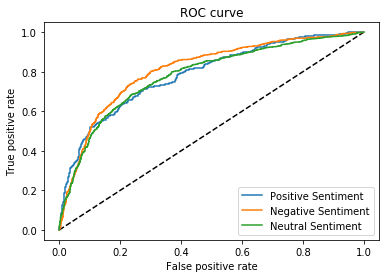

In [66]:
import matplotlib.pyplot as plt
plt.figure(2)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_positives, tpr_positives, label='Positive Sentiment')
plt.plot(fpr_negatives, tpr_negatives, label='Negative Sentiment')
plt.plot(fpr_neutrals, tpr_neutrals, label='Neutral Sentiment')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [67]:
predicted_labels = best_pipeline_for_se.predict(texts_for_testing)
print('F1-micro = {0:.6f}'.format(f1_score(labels_for_testing, predicted_labels, average='micro')))
print('F1-macro = {0:.6f}'.format(f1_score(labels_for_testing, predicted_labels, average='macro')))

F1-micro = 0.722306
F1-macro = 0.584276


In [68]:
print(classification_report(labels_for_testing, predicted_labels, digits=6))

              precision    recall  f1-score   support

    negative   0.580913  0.547588  0.563758       767
     neutral   0.797101  0.835567  0.815881      2238
    positive   0.422131  0.334416  0.373188       308

    accuracy                       0.722306      3313
   macro avg   0.600048  0.572524  0.584276      3313
weighted avg   0.712191  0.722306  0.716356      3313

